### Project 3: Scikitlearn Logistic Regression
#### Montgomery College DATA201 Spring 2019  [Steve Dutky](sdutky@gmail.com)
The third project is on Logistic Regression
 The target/label variable is discrete/qualitative and could be binary or multi-class. Choose a suitable dataset. The main goal of this project is to use the Scikitlearn Logisitic Regression, split the data into training and testing data, check the accuracy (confusion matrix / AuC).

### Where murders go unsolved:

From an investigation of unsolved murders appearing in the Washington Post on June 6, 2018.

The Washington Post compiled up to a decade of homicide arrest data from 50 of America’s largest cities.

The Post mapped and analyzed the data to identify the homicides that most often led to an arrest and those that did not.

Homicide arrest rates were calculated by victim’s race, age, gender and location. The Post’s data, which provides a level of specificity lacking in the homicide data released annually by the FBI, is being released publicly and will be expanded over 2018.

[article](https://www.washingtonpost.com/graphics/2018/investigations/where-murders-go-unsolved/?utm_term=.f1f4fb421d93)
[data](https://github.com/washingtonpost/data-homicides/raw/master/homicide-data.csv)
[maps](https://www.washingtonpost.com/graphics/2018/investigations/unsolved-homicide-database/)

## This project's intent is to use a Logistic Regression model to predict when no arrest is made for a homicide case.

#### The data in each observation:

* <B>uid</B>
    unique identifier formed from a city abbreviation and integer
* <B>reported_date</B>
    a numeric date in the form (mostly) YYYYMMDD
* <B>victim_last</B>
    string last name ignored here
* <B>victim_first</B>
    string first name ignored here
* <B>victim_race</B>
    string category
* <B>victim_age</B>
    string category
* <B>victim_sex</B>
    string category
* <B>city</B>
    string city full name
* <B>state</B>
    string state abbreviation
* <B>lat</B>
    float victim location latitude in decimal degrees
* <B>lon</B>
    float victim location lattitude in decimal degrees
* <B>disposition</B>
    string category:
        "Closed by arrest"
        "Closed without arrest"  exceptional circumstance is. suspect died
        "Open/No arrest"

#### There are 52,179 cases with 60 NA's in latitude and longitude

#### python/jupyter initialization:

In [167]:
## import packages:
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import seaborn as sns
from scipy import stats #  library of statistical functions
import sklearn #

#
# Set seed for generating psuedo random numbers
np.random.seed(12345678)
#
# Set up graphics
plt.style.use('classic')
%matplotlib notebook
%matplotlib notebook

### Get csv from Washington Post's github site

In [168]:

murder=pd.read_csv("https://github.com/washingtonpost/data-homicides/raw/master/homicide-data.csv",encoding='latin1')

murder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
uid              52179 non-null object
reported_date    52179 non-null int64
victim_last      52178 non-null object
victim_first     52179 non-null object
victim_race      52179 non-null object
victim_age       52179 non-null object
victim_sex       52179 non-null object
city             52179 non-null object
state            52179 non-null object
lat              52119 non-null float64
lon              52119 non-null float64
disposition      52179 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


### Drop 60 nan's in Longitude and Latitude

In [169]:
murder.dropna(inplace=True)
murder.index=[i for i in range(murder.shape[0])]
murder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52118 entries, 0 to 52117
Data columns (total 12 columns):
uid              52118 non-null object
reported_date    52118 non-null int64
victim_last      52118 non-null object
victim_first     52118 non-null object
victim_race      52118 non-null object
victim_age       52118 non-null object
victim_sex       52118 non-null object
city             52118 non-null object
state            52118 non-null object
lat              52118 non-null float64
lon              52118 non-null float64
disposition      52118 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 5.2+ MB


### Note reported_date in 20,151

In [170]:
print(murder.describe().T)

                 count          mean           std           min  \
reported_date  52118.0  2.013091e+07  1.124076e+06  2.007010e+07   
lat            52118.0  3.702673e+01  4.348670e+00  2.572521e+01   
lon            52118.0 -9.147126e+01  1.374646e+01 -1.225078e+02   

                        25%           50%           75%           max  
reported_date  2.010032e+07  2.012122e+07  2.015091e+07  2.015111e+08  
lat            3.376518e+01  3.852491e+01  4.002763e+01  4.505119e+01  
lon           -9.599721e+01 -8.771029e+01 -8.175569e+01 -7.101152e+01  


### Rename columns for my convenience

In [171]:
murder.columns=['uid', 'date', 'victim_last', 'victim_first', 'race',
       'age', 'sex', 'city', 'state', 'lat', 'lon',
       'disposition']
murder.columns

Index(['uid', 'date', 'victim_last', 'victim_first', 'race', 'age', 'sex',
       'city', 'state', 'lat', 'lon', 'disposition'],
      dtype='object')

### Plot murder locations on U.S. map, transparent green circles and red stars for no arrests

<IPython.core.display.Javascript object>


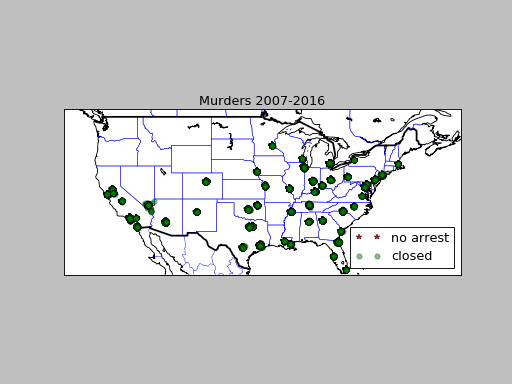

In [172]:
from mpl_toolkits.basemap import Basemap

m=Basemap(projection='mill',llcrnrlat=25,llcrnrlon=-130,urcrnrlat=50,urcrnrlon=-60,resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')



pts=[ m(murder.lon[i],murder.lat[i]) for i in range(murder.shape[0]) if murder.disposition[i]=='Open/No arrest' ]
xs=[ pts[i][0] for i in range(len(pts))]
ys=[ pts[i][1] for i in range(len(pts))]
    
m.plot(xs,ys,'r*',label='no arrest')

pts=[ m(murder.lon[i],murder.lat[i]) for i in range(murder.shape[0]) if murder.disposition[i]!='Open/No arrest' ]
xs=[ pts[i][0] for i in range(len(pts))]
ys=[ pts[i][1] for i in range(len(pts))]
    
m.plot(xs,ys,'go', alpha=.5,label='closed')


plt.title("Murders 2007-2016")
plt.legend(loc=4)
plt.show()

### See variety and distribution of categroical data

In [173]:
print(murder['disposition'].value_counts(),"\n\n",
      murder['race'].value_counts(),"\n\n",
      murder['sex'].value_counts(),"\n\n",
      murder['age'].value_counts().head()
    )

Closed by arrest         25647
Open/No arrest           23556
Closed without arrest     2915
Name: disposition, dtype: int64 

 Black       33332
Hispanic     6888
White        6319
Unknown      4198
Other         698
Asian         683
Name: race, dtype: int64 

 Male       40696
Female      7192
Unknown     4230
Name: sex, dtype: int64 

 Unknown    2997
22         2115
21         2091
23         2058
24         1994
Name: age, dtype: int64


In [174]:
a=pd.DataFrame()
a['allMurders']=murder['city'].value_counts()
a['noArrest']=0
for i in range(murder.shape[0]):
    if murder.disposition[i]=='Open/No arrest':
            a.loc[murder.city[i],'noArrest']+=1

a['noArrestRate']=a.noArrest/a.allMurders

print(a)

                allMurders  noArrest  noArrestRate
Chicago               5535      3686      0.665944
Philadelphia          3036      1267      0.417325
Houston               2933      1143      0.389703
Baltimore             2827      1673      0.591793
Detroit               2519      1466      0.581977
Los Angeles           2257      1106      0.490031
St. Louis             1672       862      0.515550
Dallas                1567       676      0.431398
Memphis               1514       433      0.285997
New Orleans           1434       832      0.580195
Las Vegas             1371       392      0.285923
Washington            1345       515      0.382900
Indianapolis          1322       492      0.372163
Kansas City           1190       450      0.378151
Jacksonville          1168       456      0.390411
Milwaukee             1115       366      0.328251
Columbus              1078       494      0.458256
Atlanta                973       315      0.323741
Oakland                947     

### Begin cleaning: map Open/No arrest to 1, closed to 0

In [175]:
df=murder[['city','state','sex']].copy()

df['noArrest']=[int(murder.disposition[i] == 'Open/No arrest') for i in range(murder.shape[0])]




### Recode ages to age ranges

In [176]:
b=[int(i) if i!="Unknown" else 0 for i in murder.age ]

print(max(b))

mapAge={}
for i in range(max(b)+1):
        if i==0:
                mapAge[i]="Unknown"
        elif i>0 and i<6:
                mapAge[i]="1to5"
        elif i>5 and i<12:
                mapAge[i]="6to11"
        elif i>11 and i<16:
                mapAge[i]="12to15"
        elif i>15 and i<20:
                mapAge[i]="16to19"
        elif i>19 and i<26:
                mapAge[i]="20to25"
        elif i>25 and i<36:
                mapAge[i]="26to35"
        elif i>35 and i<46:
                mapAge[i]="36to45"
        elif i>45 and i<56:
                mapAge[i]="46to55"
        elif i>55 and i<66:
                mapAge[i]="56to65"
        else:
                mapAge[i]="66andOlder"

df['age']=[mapAge[i] for i in b]

df['age'].value_counts()






102


26to35        13611
20to25        12082
36to45         7380
16to19         5438
46to55         4822
Unknown        3376
56to65         2242
66andOlder     1316
12to15          829
1to5            792
6to11           230
Name: age, dtype: int64

### Clean dates using strftime exceptions to locate invalid dates

In [177]:

a=['%d' % murder.date[i] for i in range(murder.shape[0]) ]
a[33547]='20151118'
a[33550]='20151105'

print('murder.date[33547]=',murder.date[33547],'\n')
print('murder.date[33550]=',murder.date[33550],'\n')

import time
# use try-catch to identify invalid dates
try: 
    for i in range(murder.shape[0]):
        [ time.strftime("%A", time.strptime(a[i],"%Y%m%d")) ]
        [ time.strftime("%b", time.strptime(a[i], "%Y%m%d")) ]
        
except ValueError as e:
    # e = sys.exc_info()[0]
    print( 'exception ', e.args)
    print(i,a[i])
    
df['day']=[ time.strftime("%A", time.strptime(a[i], "%Y%m%d")) for i in range(murder.shape[0]) ]
df['month']=[ time.strftime("%b", time.strptime(a[i], "%Y%m%d")) for i in range(murder.shape[0]) ]


murder.date[33547]= 201511018 

murder.date[33550]= 201511105 



### Collapse latitude and longitude to zones of  2.5 mile centers

In [178]:
# There are approx 69 miles per degree of longitude or latitude.
# We're going to recenter the geolocations to the nearest 2.5 mile circle:
lon=['%.4f' % (int(murder.lon[i]*1000*2.5/69)/1000*69/2.5) for i in range(murder.shape[0])]
lat=['%.4f' % (int(murder.lat[i]*1000*2.5/69)/1000*69/2.5) for i in range(murder.shape[0])]

df['zone']=[ lon[i]+'/'+lat[i] for i in range(murder.shape[0])]


In [179]:
df['race']=murder.race

### Binary encode categories for zone, day, month and age
### dummy encode race and sex

In [180]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['zone','day','month'])
dfCoded = encoder.fit_transform(df)
dfCoded.drop(columns=['zone_0','day_0','month_0'],inplace=True)
dfCoded=pd.get_dummies(dfCoded,columns=['race','sex','age'])
print(dfCoded.describe().T)

                  count      mean       std  min  25%  50%  75%  max
zone_1          52118.0  0.325511  0.468570  0.0  0.0  0.0  1.0  1.0
zone_2          52118.0  0.298112  0.457433  0.0  0.0  0.0  1.0  1.0
zone_3          52118.0  0.413485  0.492463  0.0  0.0  0.0  1.0  1.0
zone_4          52118.0  0.533347  0.498891  0.0  0.0  1.0  1.0  1.0
zone_5          52118.0  0.518170  0.499675  0.0  0.0  1.0  1.0  1.0
zone_6          52118.0  0.541982  0.498239  0.0  0.0  1.0  1.0  1.0
zone_7          52118.0  0.536744  0.498653  0.0  0.0  1.0  1.0  1.0
zone_8          52118.0  0.513796  0.499814  0.0  0.0  1.0  1.0  1.0
zone_9          52118.0  0.502936  0.499996  0.0  0.0  1.0  1.0  1.0
zone_10         52118.0  0.511033  0.499883  0.0  0.0  1.0  1.0  1.0
zone_11         52118.0  0.494263  0.499972  0.0  0.0  0.0  1.0  1.0
zone_12         52118.0  0.511148  0.499881  0.0  0.0  1.0  1.0  1.0
day_1           52118.0  0.570283  0.495040  0.0  0.0  1.0  1.0  1.0
day_2           52118.0  0.605933 

### Split the encoded dataframe dfCoded into training and testing sets

In [181]:
from sklearn.model_selection import train_test_split

predictorColummns= [a for a in dfCoded.columns if a!='city' and a!='state' and a!='noArrest' ]
predictors=dfCoded[predictorColummns].copy()
target=dfCoded[["noArrest"]].copy()
Xtrain, Xtest, yTrain, yTest = train_test_split( predictors, target, test_size=0.25, random_state=9)

### Fit the logisitic model to the training set

In [182]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs',max_iter=1000)
logistic.fit(Xtrain,np.ravel(yTrain))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Determine the accuracy of the logistic model

score(X, y, sample_weight=None) method of sklearn.linear_model.logistic.LogisticRegression instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.

In [183]:
print(logistic.score(Xtest, np.ravel(yTest) ))

0.6001534919416731


### Produce the confusion matrix
Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.

## How well does a classifier perform?
#### Liberally excerpted from Wikipedia:

#### precision and recall:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png">

#### confusion matrix:
<img src="https://github.com/sdutky/mcData201/raw/master/project3sources/confusionMatrix.png">

#### F1 score

Precision and recall
In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

The traditional F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall:

$${\displaystyle F_{1}=\left({\frac {\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}{2}}\right)^{-1}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}} {\displaystyle F_{1}=\left({\frac {\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}{2}}\right)^{-1}=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$$.

$${\displaystyle {\text{F1 score}}={\frac {2TP}{2TP+FP+FN}}}$$
(Equation 2, F1 score: worst value = 0; best value = 1)


#### Matthews correlation coefficient aka MCC

The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications, introduced by biochemist Brian W. Matthews in 1975.[1] It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes.[2] The MCC is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1. A coefficient of +1 represents a perfect prediction, 0 no better than random prediction and −1 indicates total disagreement between prediction and observation. 

While there is no perfect way of describing the confusion matrix of true and false positives and negatives by a single number, the Matthews correlation coefficient is generally regarded as being one of the best such measures.[3] Other measures, such as the proportion of correct predictions (also termed accuracy), are not useful when the two classes are of very different sizes. For example, assigning every object to the larger set achieves a high proportion of correct predictions, but is not generally a useful classification.

The MCC can be calculated directly from the confusion matrix using the formula:

$${\displaystyle {\text{MCC}}={\frac {{\mathit {TP}}\times {\mathit {TN}}-{\mathit {FP}}\times {\mathit {FN}}}{\sqrt {({\mathit {TP}}+{\mathit {FP}})({\mathit {TP}}+{\mathit {FN}})({\mathit {TN}}+{\mathit {FP}})({\mathit {TN}}+{\mathit {FN}})}}}} {\displaystyle {\text{MCC}}={\frac {{\mathit {TP}}\times {\mathit {TN}}-{\mathit {FP}}\times {\mathit {FN}}}{\sqrt {({\mathit {TP}}+{\mathit {FP}})({\mathit {TP}}+{\mathit {FN}})({\mathit {TN}}+{\mathit {FP}})({\mathit {TN}}+{\mathit {FN}})}}}}$$

In this equation, TP is the number of true positives, TN the number of true negatives, FP the number of false positives and FN the number of false negatives. If any of the four sums in the denominator is zero, the denominator can be arbitrarily set to one; this results in a Matthews correlation coefficient of zero, which can be shown to be the correct limiting value.



In [184]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef, f1_score
a=pd.DataFrame(confusion_matrix(yTest, logistic.predict(Xtest)))
a.columns=['actual closed','actual no arrest']
a.index=['predicted closed','prediced no arrest']
print("Confusion Matrix:\n",a)

print("F1 score = ",f1_score(yTest,logistic.predict(Xtest)))

print("MCC = ",matthews_corrcoef(yTest,logistic.predict(Xtest)))

Confusion Matrix:
                     actual closed  actual no arrest
predicted closed             4827              2340
prediced no arrest           2870              2993
F1 score =  0.5346552340121472
MCC =  0.18615880242228736


### Receiver operating characteristic

#### History
The ROC curve was first used during World War II for the analysis of radar signals before it was employed in signal detection theory. Following the attack on Pearl Harbor in 1941, the United States army began new research to increase the prediction of correctly detected Japanese aircraft from their radar signals. For these purposes they measured the ability of a radar receiver operator to make these important distinctions, which was called the Receiver Operating Characteristic.

In the 1950s, ROC curves were employed in psychophysics to assess human (and occasionally non-human animal) detection of weak signals. In medicine, ROC analysis has been extensively used in the evaluation of diagnostic tests. ROC curves are also used extensively in epidemiology and medical research and are frequently mentioned in conjunction with evidence-based medicine. In radiology, ROC analysis is a common technique to evaluate new radiology techniques. In the social sciences, ROC analysis is often called the ROC Accuracy Ratio, a common technique for judging the accuracy of default probability models. ROC curves are widely used in laboratory medicine to assess the diagnostic accuracy of a test, to choose the optimal cut-off of a test and to compare diagnostic accuracy of several tests.

ROC curves also proved useful for the evaluation of machine learning techniques. The first application of ROC in machine learning was by Spackman who demonstrated the value of ROC curves in comparing and evaluating different classification algorithms.

ROC curves are also used in verification of forecasts in meteorology.
To draw an ROC curve, only the true positive rate (TPR) and false positive rate (FPR) are needed (as functions of some classifier parameter). The TPR defines how many correct positive results occur among all positive samples available during the test. FPR, on the other hand, defines how many incorrect positive results occur among all negative samples available during the test.

#### Method
An ROC space is defined by FPR and TPR as x and y axes, respectively, which depicts relative trade-offs between true positive (benefits) and false positive (costs). Since TPR is equivalent to sensitivity and FPR is equal to 1 − specificity, the ROC graph is sometimes called the sensitivity vs (1 − specificity) plot. Each prediction result or instance of a confusion matrix represents one point in the ROC space.

The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing 100% sensitivity (no false negatives) and 100% specificity (no false positives). The (0,1) point is also called a perfect classification. A random guess would give a point along a diagonal line (the so-called line of no-discrimination) from the left bottom to the top right corners (regardless of the positive and negative base rates). An intuitive example of random guessing is a decision by flipping coins. As the size of the sample increases, a random classifier's ROC point tends towards the diagonal line. In the case of a balanced coin, it will tend to the point (0.5, 0.5).

The diagonal divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random). Note that the output of a consistently bad predictor could simply be inverted to obtain a good predictor.

<IPython.core.display.Javascript object>


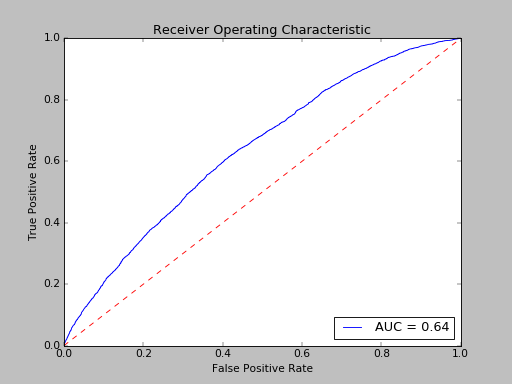

In [185]:
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
probs = logistic.predict_proba(Xtest)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(yTest, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Classification Thresholds - calculated probabilities from sklearn.linear_model.logistic:

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.

<IPython.core.display.Javascript object>


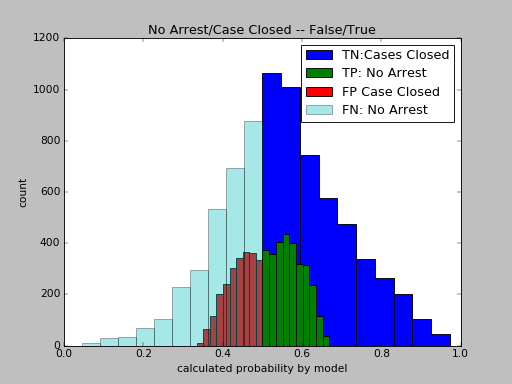

In [186]:
a=logistic.predict_proba(Xtest)

dProbs=pd.DataFrame({'yTest':yTest.noArrest,
                     'yPred':logistic.predict(Xtest),
                     'pNoArrest':a[:,1],
                     'pClosed':a[:,0]})

plt.figure()
plt.title('No Arrest/Case Closed -- False/True')
plt.xlabel('calculated probability by model')
plt.ylabel('count')

d=dProbs[list(dProbs.yTest==dProbs.yPred)].copy()
plt.hist(d.pClosed[list(d.yTest==0)],label='TN:Cases Closed',alpha=1)
plt.hist(d.pNoArrest[list(d.yTest==1)],label='TP: No Arrest',alpha=1)

d=dProbs[list(dProbs.yTest!=dProbs.yPred)].copy()
plt.hist(d.pClosed[list(d.yTest==0)],label='FP Case Closed',alpha=1)
plt.hist(d.pNoArrest[list(d.yTest==1)],label='FN: No Arrest',alpha=.35)

plt.legend(loc=1)

plt.show()

### Print the feature coefficients

In [187]:
print(pd.DataFrame({'features':Xtrain.columns,'coefficients':np.ravel(logistic.coef_)}))


          features  coefficients
0           zone_1     -0.246519
1           zone_2     -0.437697
2           zone_3     -0.068221
3           zone_4      0.073922
4           zone_5      0.002465
5           zone_6      0.092818
6           zone_7      0.069716
7           zone_8      0.036191
8           zone_9      0.001686
9          zone_10     -0.015611
10         zone_11      0.008533
11         zone_12     -0.014583
12           day_1      0.016078
13           day_2      0.019797
14           day_3      0.011785
15         month_1      0.255733
16         month_2      0.076544
17         month_3      0.041949
18         month_4      0.044996
19      race_Asian     -0.433368
20      race_Black      0.195757
21   race_Hispanic      0.143941
22      race_Other      0.122200
23    race_Unknown      0.481147
24      race_White     -0.496309
25      sex_Female     -0.329665
26        sex_Male      0.395871
27     sex_Unknown     -0.052839
28      age_12to15      0.005875
29      ag

## See which set of features produce better scores
### 1. map features to encoded columns

In [188]:
cols={ 
    'zone':['zone_1', 'zone_2', 'zone_3', 'zone_4', 'zone_5', 'zone_6', 'zone_7', 'zone_8', 'zone_9', 'zone_10', 'zone_11', 'zone_12'], 
    'day':['day_1', 'day_2', 'day_3'],
    'month':[ 'month_1', 'month_2', 'month_3', 'month_4'], 
    'age':['age_12to15', 'age_16to19', 'age_1to5', 'age_20to25', 'age_26to35', 'age_36to45', 'age_46to55', 'age_56to65', 'age_66andOlder', 'age_6to11'
], 
    'sex':['sex_Male','sex_Female','sex_Unknown'], 
    'race':['race_Asian', 'race_Black', 'race_Hispanic', 'race_Other', 'race_Unknown', 'race_White'] 
}
keys=list(cols.keys())
keys

['zone', 'day', 'month', 'age', 'sex', 'race']

### 2. generate all combinations of features and formulae

In [189]:
import itertools

featureSet=list()
formulas=list()
for count in range(1, len(keys)+1):
    for combo in itertools.combinations(keys,count):
        a=list(combo)
        b=list()
        c='noArrest~'
        for i in range(len(a)):
            b+=cols[a[i]]
            c='%s%s+' % (c,a[i])
        featureSet.append(b)
        formulas.append(c[:-1])

best=pd.DataFrame({'formula':formulas,'scoreTrain':0,'scoreTest':0,'set':list(range(len(featureSet)))})
        

### 3. use the training set to fit a logistic model to each combination of features and collect the score of each for the training and test sets

In [190]:
scoreTrain=list()
scoreTest=list()

for i in range(best.shape[0]):
    
    logistic.fit(Xtrain[featureSet[i]],np.ravel(yTrain))
    scoreTest+=[logistic.score(Xtest[featureSet[i]], np.ravel(yTest) )]
    scoreTrain+=[logistic.score(Xtrain[featureSet[i]], np.ravel(yTrain) )]
    
best.scoreTest=scoreTest
best.scoreTrain=scoreTrain
    

### See which formulae score best

In [191]:
best.sort_values(by='scoreTrain',ascending=False)

,formula,scoreTrain,scoreTest,set
59,noArrest~zone+day+age+sex+race,0.605633,0.599616,59
50,noArrest~zone+age+sex+race,0.605506,0.600230,50
60,noArrest~zone+month+age+sex+race,0.605147,0.600384,60
62,noArrest~zone+day+month+age+sex+race,0.605019,0.600000,62
49,noArrest~zone+month+sex+race,0.598445,0.589256,49
47,noArrest~zone+month+age+sex,0.598163,0.593246,47
56,noArrest~zone+day+month+age+sex,0.598086,0.592786,56
58,noArrest~zone+day+month+sex+race,0.597344,0.590944,58
44,noArrest~zone+day+age+sex,0.596986,0.595856,44
46,noArrest~zone+day+sex+race,0.596935,0.593093,46
